In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from scipy.sparse import coo_matrix

from dataset import QM9

from torch_geometric.datasets import QM9 as TQM9
from torch_geometric.data import Data



RDKit WARNING: [22:51:46] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
ds_params = {'train_params': {'n': 10,
                              'features': ['n_atoms','A','B','C','mu',
                                           'alpha','homo','lumo','gap','r2','zpve','Cv',
                                           'mulliken'],
                              'embeds': ['atom_types'],
                              'targets': ['U0'],
                              'pad': None,
                              'do_not_pad': ['U0','n_atoms','A','B','C','mu',
                                             'alpha','homo','lumo','gap','r2','zpve','Cv'],
                              #'filter_on': ('n_atoms','>','18'),
                              'use_pickle': False,
                              'flatten': True,
                              'embed_lookup': {'H': 0, 'C': 1, 'N': 2, 'O': 3, 'F': 4,
                                               'sp': 0, 'sp2': 1, 'sp3': 2, 'na': 3,
                                               0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6,
                                               7: 7, 8: 8, 9: 9, 10: 10, '0': 0}}}

qm9 = QM9(**ds_params['train_params'])

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  1
total uncharacterized molecules removed:  0
total QM9 molecules created:  10
CDataset created...


In [3]:
mol = qm9.ds[2]
mol

dsgdb9nsd_000002

In [4]:
qm9[9]

(array([ 7.0000000e+00,  1.6028041e+02,  8.5932302e+00,  8.5932102e+00,
         7.1560001e-01,  2.8780001e+01, -2.6089999e-01,  6.1299998e-02,
         3.2220000e-01,  1.7719630e+02,  5.5410001e-02,  1.2482000e+01,
        -4.9301699e-01,  2.8658599e-01, -4.4302499e-01,  1.5108700e-01,
         1.5109199e-01,  1.5109700e-01,  1.9618200e-01], dtype=float32),
 [array([1, 1, 1, 0, 0, 0, 0])],
 array([-116.60955], dtype=float32))

In [5]:
mol.smile

'N\tN\t\n'

In [6]:
mol.xyz

AttributeError: 'QM9Mol' object has no attribute 'xyz'

In [7]:
mol.qm9_block_xyz

array([[-0.04042605,  1.0241077 ,  0.0625638 ],
       [ 0.01725746,  0.01254521, -0.02737716],
       [ 0.91578937,  1.3587452 , -0.02875776],
       [-0.52027774,  1.3435321 , -0.7755426 ]], dtype=float32)

In [8]:
mol.distance

AttributeError: 'QM9Mol' object has no attribute 'distance'

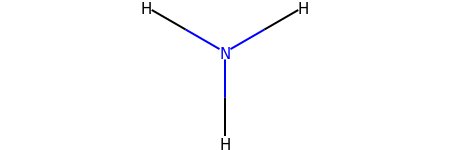

In [9]:
mol.rdmol

In [10]:
dir(mol)

['A',
 'B',
 'C',
 'Cv',
 'G',
 'H',
 'U',
 'U0',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'alpha',
 'aromatic',
 'atom_types',
 'atomic_n',
 'atomic_numbers',
 'charge',
 'chirality',
 'create_adjacency',
 'create_coulomb',
 'create_distance',
 'create_rdmol_data',
 'db',
 'degree',
 'e_map',
 'edge_attr',
 'edge_index',
 'embed_rdmol',
 'gap',
 'homo',
 'hybridization',
 'in_file',
 'load_data',
 'lumo',
 'mol_block',
 'mu',
 'mulliken',
 'n_atoms',
 'n_hs',
 'n_rads',
 'open_file',
 'properties',
 'qm9_block',
 'qm9_block_xyz',
 'r2',
 'rdmol',
 'rdmol_from_smile',
 'ring',
 'smile',
 'sort_permute',
 'x_map

In [11]:
mol.edge_attr

array([['SINGLE', 'STEREONONE', 'False'],
       ['SINGLE', 'STEREONONE', 'False'],
       ['SINGLE', 'STEREONONE', 'False'],
       ['SINGLE', 'STEREONONE', 'False'],
       ['SINGLE', 'STEREONONE', 'False'],
       ['SINGLE', 'STEREONONE', 'False']], dtype='<U10')

In [12]:
mol.n_rads

array([0, 0, 0, 0])

In [ ]:
coo = coo_matrix(mol.adjacency)
print(coo)
print(coo.row)
print(coo.col)
print(coo.data)

In [ ]:
import numpy as np
z = [mol.atomic_n[a] for a in mol.atom_types]
z = np.asarray(z, 'int64')
print(z)

In [ ]:
import torch

In [ ]:
x = torch.unsqueeze(torch.tensor(qm9[2][0]), 0)
z = torch.tensor(z)
y = torch.tensor(qm9[2][2])
xyz = torch.tensor(mol.xyz)
edge_index = torch.tensor([coo.row, coo.col]).contiguous()


In [ ]:
data = Data(x=x, z=z, y=y, pos=xyz, edge_index=edge_index)
print(data)

In [ ]:
print('x', x.shape)
print(type(x))
print('z', z.shape)
print(z.dtype)
print('y', y.shape)
print('xyz', xyz.shape)
print('edge_index', edge_index)

In [ ]:
data

In [ ]:
tqm9 = TQM9(root='./data/qm9')

In [ ]:
graph = tqm9[0]

In [ ]:
graph

In [ ]:
data.num_edges

In [ ]:
data.num_node_features

In [ ]:
graph.num_node_features

In [ ]:
data.keys

In [ ]:
graph.keys

In [ ]:
data.num_nodes

In [ ]:
graph.num_nodes

In [ ]:
graph.x

In [ ]:
graph.edge_attr

In [ ]:
mol.adjacency

In [ ]:
mol.coulomb

In [ ]:
mol.distance

In [ ]:
mol.smile

In [ ]:
data.y

In [ ]:
graph.y

In [ ]:
data.z

In [ ]:
graph.z

In [ ]:
data.pos

In [ ]:
graph.pos

In [ ]:
graph.edge_attr

In [ ]:
graph.edge_index

In [ ]:
data.edge_index